<a href="https://colab.research.google.com/github/YashMalviya01/Data-Analysis-Projects-/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Yash Malviya

Task - Task 3 , Time Series Forecasting

Date - 14/07/2024

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
df=pd. read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df=df.dropna()
print( 'Shape of data',df.shape)
df. head ()

Shape of data (325, 1)


,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df=pd. read_csv('Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df=df.dropna()
print( 'Shape of data',df.shape)
df. head ()

Shape of data (588, 1)


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


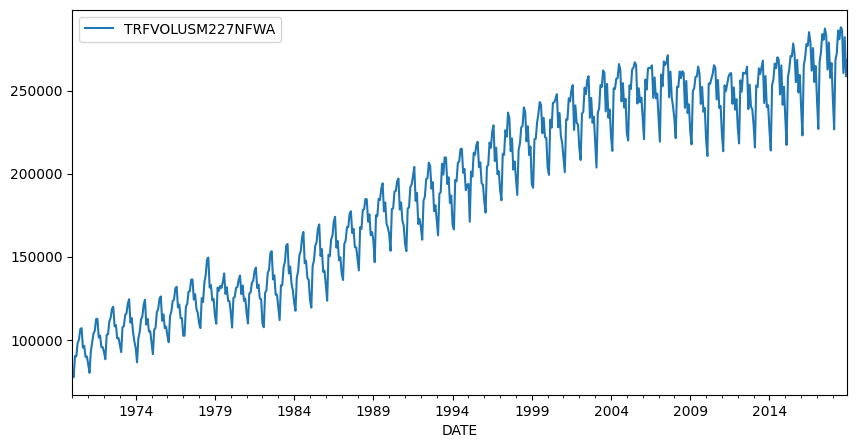

In [ ]:
df.plot(figsize=(10,5))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF:", dftest[0])
    print("2. P-Value:", dftest[1])
    print("3. Num Of Lags:", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print(f"\t{key}: {val}")



In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Call the ad_test function on the specific column
ad_test(df['TRFVOLUSM227NFWA'])


1. ADF: -1.2425483519561509
2. P-Value: 0.6550300653192408
3. Num Of Lags: 17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 570
5. Critical Values:
	1%: -3.441874550188182
	5%: -2.8666239496633246
	10%: -2.569477593105571


Figure out order of Arima Model.

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Fit the ARIMA model
stepwise_fit = auto_arima(df['TRFVOLUSM227NFWA'], trace=True, suppress_warnings=True)

# Print the summary of the fitted model
print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12458.015, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12761.758, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12721.923, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12730.238, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12760.134, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12694.062, Time=0.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12664.528, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12367.547, Time=1.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12602.248, Time=0.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12486.439, Time=0.89 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12671.206, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12546.779, Time=0.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=12322.418, Time=3.36 sec
 ARIMA(5,1,3)(0,0,0)[0] i

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[: -30]
test=df.iloc [-30:]
print(train. shape, test. shape)

(588, 2)
(558, 2) (30, 2)


In [ ]:
model=ARIMA(train['TRFVOLUSM227NFWA'],order=(1,0,5))
model=model.fit()
model. summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       TRFVOLUSM227NFWA   No. Observations:                  558
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -5941.468
Date:                Tue, 16 Jul 2024   AIC                          11898.935
Time:                        10:59:18   BIC                          11933.530
Sample:                             0   HQIC                         11912.446
                                - 558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.862e+05   1.46e-08   1.27e+13      0.000    1.86e+05    1.86e+05
ar.L1          0.9996      0.001    897.766      0.000       0.997       1.002
ma.L1         -0.3418      0.056     -6.132      0.000      -0.451      -0.233
ma.L2         -0.0634      0.044     -1.430      0.153      -0.150       0.024
ma.L3          0.4648      0.037     12.461      0.000       0.392       0.538
ma.L4         -0.6835      0.038    -17.874      0.000      -0.758      -0.609
ma.L5         -0.1715      0.056     -3.074      0.002      -0.281      -0.062
sigma2      1.298e+08    7.3e-11   1.78e+18      0.000     1.3e+08     1.3e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 6.53
Prob(Q):                              0.66   Prob(JB):                         0.04
Heteroskedasticity (H):               3.12   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.22e+34. Standard errors may be unstable.
"""

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Split the data into train and test sets (adjust the column name as necessary)
train = df['TRFVOLUSM227NFWA'][:int(0.8*len(df))]
test = df['TRFVOLUSM227NFWA'][int(0.8*len(df)):]

# Find the best ARIMA model using auto_arima
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

# Get the best parameters
p, d, q = stepwise_fit.order

# Fit the ARIMA model with the best parameters
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Define the start and end points for prediction
start = len(train)
end = len(train) + len(test) - 1

# Generate predictions
pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10102.105, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10078.673, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10085.259, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10100.412, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10068.371, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10067.537, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10035.136, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10030.844, Time=0.49 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9917.922, Time=1.84 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9935.208, Time=1.80 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=9916.947, Time=3.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9916.256, Time=1.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9788.476, Time=1.47 sec
 ARIMA(3,1,1)(0,0,0)[0] interc

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10102.105, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10078.673, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10085.259, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10100.412, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10068.371, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10067.537, Time=0.46 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10035.136, Time=0.89 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10030.844, Time=0.90 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9917.922, Time=1.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9935.208, Time=0.64 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=9916.947, Time=1.68 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9916.256, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9788.476, Time=1.42 sec
 ARIMA(3,1,1)(0,0,0)[0] interc

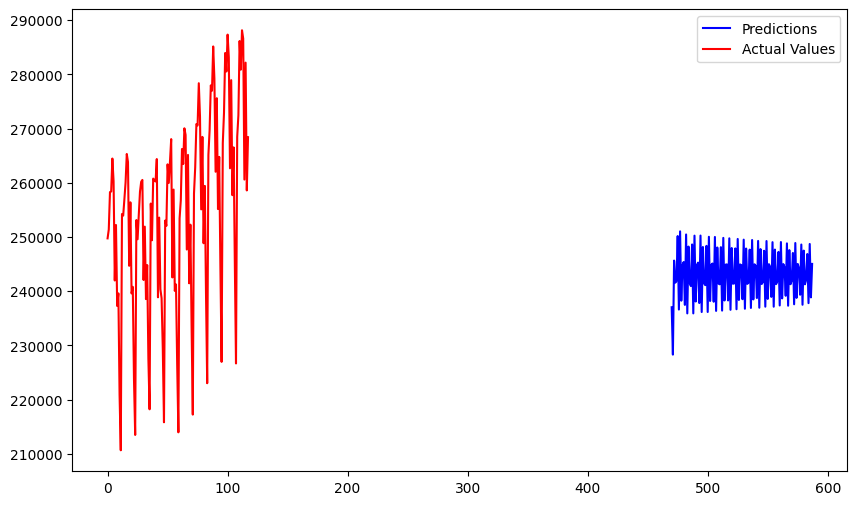

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Split the data into train and test sets (adjust the column name as necessary)
train = df['TRFVOLUSM227NFWA'][:int(0.8*len(df))]
test = df['TRFVOLUSM227NFWA'][int(0.8*len(df)):]

# Find the best ARIMA model using auto_arima
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

# Get the best parameters
p, d, q = stepwise_fit.order

# Fit the ARIMA model with the best parameters
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Define the start and end points for prediction
start = len(train)
end = len(train) + len(test) - 1

# Generate predictions
pred = model_fit.predict(start=start, end=end, typ='levels')

# Plotting the predictions and actual values
plt.figure(figsize=(10,6))
plt.plot(pred, label='Predictions', color='blue')
plt.plot(test.values, label='Actual Values', color='red')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 20870.883093317967


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Fit the ARIMA model
model12 = ARIMA(df['TRFVOLUSM227NFWA'], order=(1, 0, 5))
model12_fit = model12.fit()

# Print the last few rows of your DataFrame
print(df.tail())


           DATE  TRFVOLUSM227NFWA
583  2018-08-01          286608.0
584  2018-09-01          260595.0
585  2018-10-01          282174.0
586  2018-11-01          258590.0
587  2018-12-01          268413.0


For Future Dates

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv('Miles_Traveled.csv')

# Fit the ARIMA model
model12 = ARIMA(df['TRFVOLUSM227NFWA'], order=(1, 0, 5))
model12_fit = model12.fit()

# Generate future date range
index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-29')
print(index_future_dates)

# Predict future values
pred = model12_fit.predict(start=len(df), end=len(df)+29, typ='levels').rename('ARIMA Predictions')
print(pred)


print(pred)


DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')
588    269317.474674
589    250500.708818
590    270870.946647
591    268379.241901
592    266747.625133
593    266718.165931
594    266688.718099
595    266659.281634
596    266629.856529
597    266600.442781
598    266571.040386
599    266541.649339
600    266512.269635
601    266482.901271
602    266453.544242
603    266424.198544
604    266394.864171
605    266365.541121
606    266336.22938

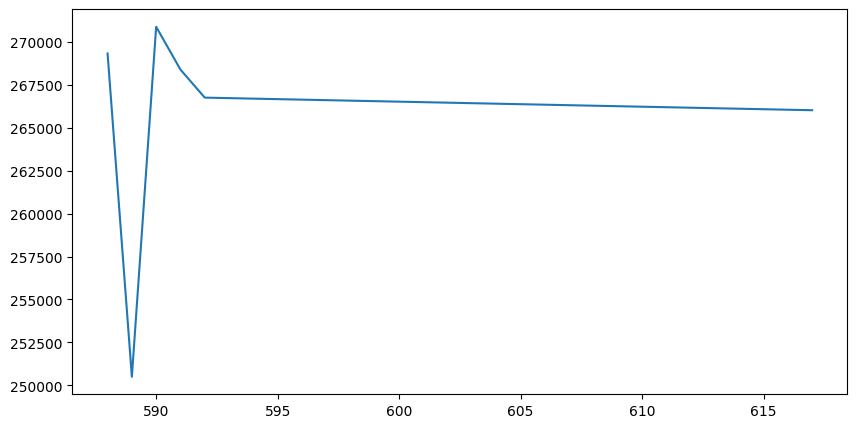

In [ ]:
pred.plot(figsize=(10,5))
plt.show()